In [15]:
# Setting up a custom stylesheet in IJulia
from IPython.core.display import HTML
from IPython import utils  
import urllib2
HTML(urllib2.urlopen('http://bit.ly/1Bf5Hft').read())
#HTML("""
#<style>
#open('style.css','r').read()
#</style>
#""")

In [10]:
%matplotlib inline

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sympy as sym
sym.init_printing() 
import solowpy

In [12]:
# define model parameters
ces_params = {'A0': 1.0, 'L0': 1.0, 'g': 0.02, 'n': 0.03, 's': 0.15,
              'delta': 0.05, 'alpha': 0.33, 'sigma': 1.01}

# create an instance of the solow.Model class
ces_model = solowpy.CESModel(params=ces_params)

# 5. Impulse response functions

Impulse response functions (IRFs) are a standard tool for analyzing the short run dynamics of dynamic macroeconomic models, such as the Solow growth model, in response to an exogenous shock. The `solow.impulse_response.ImpulseResponse` class has several attributes and methods for generating and analyzing impulse response functions. 

In [17]:
# use tab completion to see the available attributes and methods...
solowpy.impulse_response.ImpulseResponse.

SyntaxError: invalid syntax (<ipython-input-17-e1891f563aba>, line 2)

The `solow.Model` class provides access to all of the functionality of the `solow.impulse_response.ImpulseResponse` class through its `irf` attribute.

In [18]:
# use tab completion to see the available attributes and methods...
ces_model.irf.

SyntaxError: invalid syntax (<ipython-input-18-9386e48810e2>, line 2)

### Example: Impact of a change in the savings rate
One can analyze the impact of a doubling of the savings rate on model variables as follows.

In [30]:
# 100% increase in the current savings rate...
ces_model.irf.impulse = {'s': 2.0 * ces_model.params['s']}

# in efficiency units...
ces_model.irf.kind = 'efficiency_units'

Take a look at the IRF for the savings rate shock. Note that while capital and output are unaffected at the `t=0`, both consumption and investment jump (in opposite directions!) in response to the change in the savings rate.

In [31]:
# ordering of variables is t, k, y, c, i!
print(ces_model.irf.impulse_response[:25,])

[[-10.           1.83266593   1.22177729   1.03851069   0.18326659]
 [ -9.           1.83266593   1.22177729   1.03851069   0.18326659]
 [ -8.           1.83266593   1.22177729   1.03851069   0.18326659]
 [ -7.           1.83266593   1.22177729   1.03851069   0.18326659]
 [ -6.           1.83266593   1.22177729   1.03851069   0.18326659]
 [ -5.           1.83266593   1.22177729   1.03851069   0.18326659]
 [ -4.           1.83266593   1.22177729   1.03851069   0.18326659]
 [ -3.           1.83266593   1.22177729   1.03851069   0.18326659]
 [ -2.           1.83266593   1.22177729   1.03851069   0.18326659]
 [ -1.           1.83266593   1.22177729   1.03851069   0.18326659]
 [  0.           1.83266593   1.22177729   0.8552441    0.36653319]
 [  1.           2.01275138   1.26032782   0.88222947   0.37809834]
 [  2.           2.18618199   1.29535125   0.90674587   0.38860537]
 [  3.           2.35264866   1.32727865   0.92909505   0.39818359]
 [  4.           2.51198357   1.35646703   0.949

### Example: Plotting an impulse response function
One can use a convenience method to to plot the impulse response functions for a particular variable.

In [21]:
# check the docstring to see the call signature
ces_model.irf.plot_impulse_response?

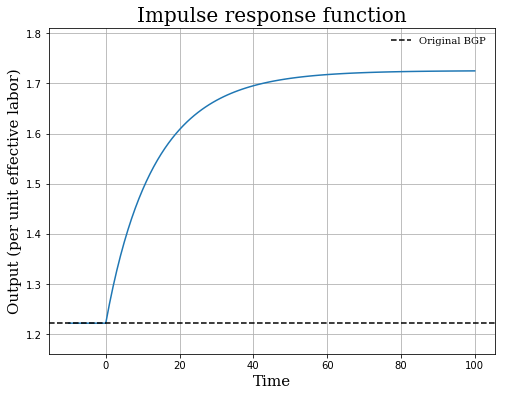

In [32]:
fig, ax = plt.subplots(1, 1, figsize=(8,6))
ces_model.irf.plot_impulse_response(ax, variable='output')
plt.show()

### Example: More complicated impulse responses are possible
Note that by defining impulses as dictionaries, one can analyze extremely general shocks. For example, suppose that an exogenous 5% increase in the growth rate of technology was accompanied by a simultaneous 10% fall in the savings rate.

In [33]:
# more complicate shocks are possible
ces_model.irf.impulse = {'s': 0.9 * ces_model.params['s'], 'g': 1.05 * ces_model.params['g']}

# in efficiency units...
ces_model.irf.kind = 'per_capita'

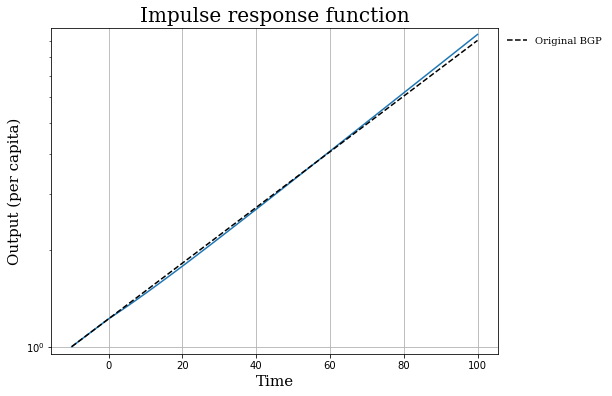

In [34]:
fig, ax = plt.subplots(1, 1, figsize=(8,6))
ces_model.irf.plot_impulse_response(ax, variable='output', log=True)
plt.show()

### Example: Interactive impulse reponse functions
Using IPython widgets makes it extremely easy to analyze the various impulse response functions.

In [35]:
#from IPython.html.widgets import fixed, interact, FloatSliderWidget
from IPython.html.widgets import fixed, interact

from ipywidgets import fixed,interact, FloatSlider, IntSlider

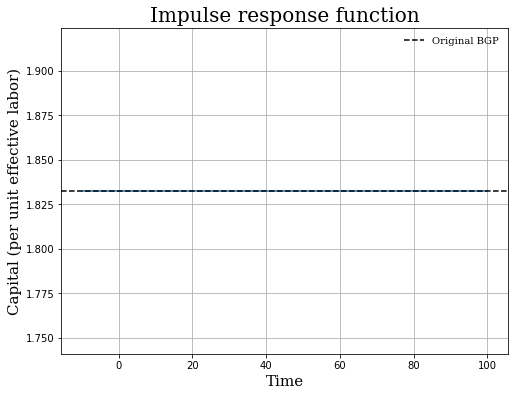

In [36]:
def interactive_impulse_response(model, shock, param, variable, kind, log_scale):
    """Interactive impulse response plotting tool."""    
    # specify the impulse response
    model.irf.impulse = {param: shock * model.params[param]}
    model.irf.kind = kind
    
    # create the plot
    fig, ax = plt.subplots(1, 1, figsize=(8,6))
    model.irf.plot_impulse_response(ax, variable=variable, log=log_scale)
    

irf_widget = interact(interactive_impulse_response, 
                      model=fixed(ces_model),
                      shock = FloatSlider(min=0.1, max=5.0, step=0.1, value=0.5),
                      param = ces_model.params.keys(),
                      variable=['capital', 'output', 'consumption', 'investment'],
                      kind=['efficiency_units', 'per_capita', 'levels'],
                      log_scale=False,
                      )